### Step 1: Frameworks loading

In [96]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# step1:load data
df=pd.read_csv('Details.csv')

In [3]:
# step2:create database in sqlite3
connection=sqlite3.connect('task.db')

In [4]:
# step3:import data to sqlite
# if_exists=fail/replace/append
df.to_sql("sale_data",connection, if_exists='replace')

1500

In [6]:
cur=connection.cursor()

### Step 2: Data analysis & Visualization

In [118]:
cur.execute('select count(*) from sale_data')
r1=cur.fetchall()

In [119]:
print(r1)

[(1500,)]


In [120]:
cur.execute('select sum(quantity) from sale_data')
r2=cur.fetchall()

In [121]:
print('Total units of products sold in 2018\n',r2)

Total units of products sold in 2018
 [(5615,)]


In [122]:
cur.execute('select sum(quantity*amount) from sale_data')
r3=cur.fetchall()

In [123]:
print('total sales in 2018\n',r3)

total sales in 2018
 [(2172002,)]


In [124]:
# category wise profit
cur.execute('''select category,sum(quantity*amount) from sale_data
group by category
order by sum(quantity*amount) desc''')
r4=cur.fetchall()

In [125]:
print('category wise profit\n',r4)

category wise profit
 [('Electronics', 818583), ('Clothing', 687654), ('Furniture', 665765)]


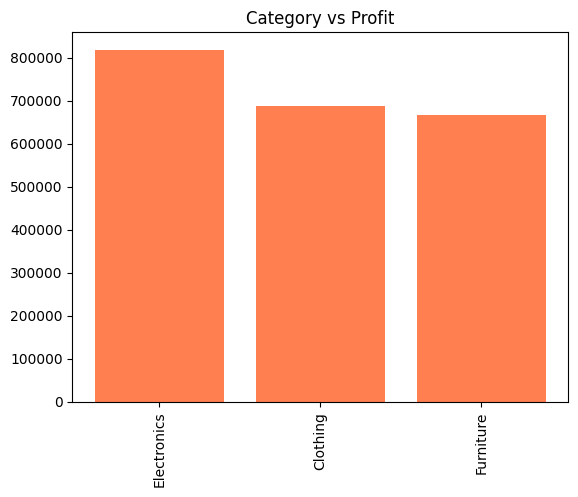

In [126]:
def plot1():
    category=[]
    profit=[]
    for row in r4:
        category.append(row[0])
        profit.append(row[1])
    plt.bar(category, profit,color='coral')
    plt.title('Category vs Profit')
    plt.xticks(rotation=90)
    plt.show()
plot1()

In [127]:
# print payment mode wise revenue
cur.execute('''select PaymentMode,sum(quantity*amount) from sale_data
group by PaymentMode
order by sum(quantity*amount) desc''')
r5=cur.fetchall()

In [128]:
print('payment mode wise revenue\n',r5)

payment mode wise revenue
 [('COD', 724058), ('EMI', 518704), ('Credit Card', 430481), ('UPI', 299933), ('Debit Card', 198826)]


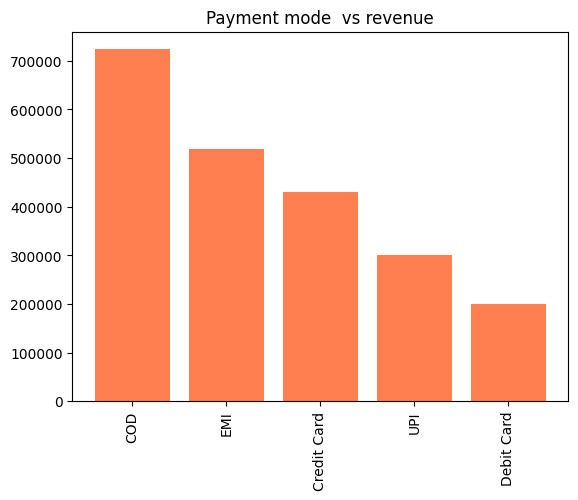

In [129]:
def plot2():
    mode=[]
    revenue=[]
    for row in r5:
        mode.append(row[0])
        revenue.append(row[1])
    plt.bar(mode, revenue,color='coral')
    plt.title('Payment mode  vs revenue')
    plt.xticks(rotation=90)
    plt.show()
plot2()

In [130]:
# print category wise profit
cur.execute('''select Category,sum(profit) from sale_data
group by Category
order by sum(profit) desc''')
r6=cur.fetchall()

In [131]:
print('category wise profit\n',r6)

category wise profit
 [('Clothing', 13325), ('Electronics', 13162), ('Furniture', 10476)]


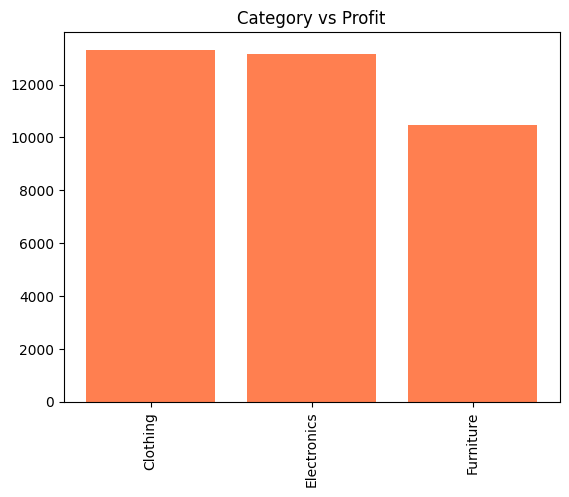

In [132]:
def plot3():
    category=[]
    profit=[]
    for row in r6:
        category.append(row[0])
        profit.append(row[1])
    plt.bar(category, profit,color='coral')
    plt.title('Category vs Profit')
    plt.xticks(rotation=90)
    plt.show()
plot3()

In [133]:
# print sub category wise units
cur.execute('''select `Sub-Category`,sum(Quantity) from sale_data
group by `Sub-Category`
order by sum(Quantity) desc''')
r7=cur.fetchall()

In [134]:
print("sub category wise units\n",r7)

sub category wise units
 [('Saree', 795), ('Hankerchief', 741), ('Stole', 671), ('Furnishings', 310), ('T-shirt', 305), ('Phones', 304), ('Electronic Games', 297), ('Bookcases', 297), ('Printers', 291), ('Chairs', 277), ('Shirt', 271), ('Accessories', 262), ('Skirt', 248), ('Leggings', 186), ('Kurti', 164), ('Trousers', 135), ('Tables', 61)]


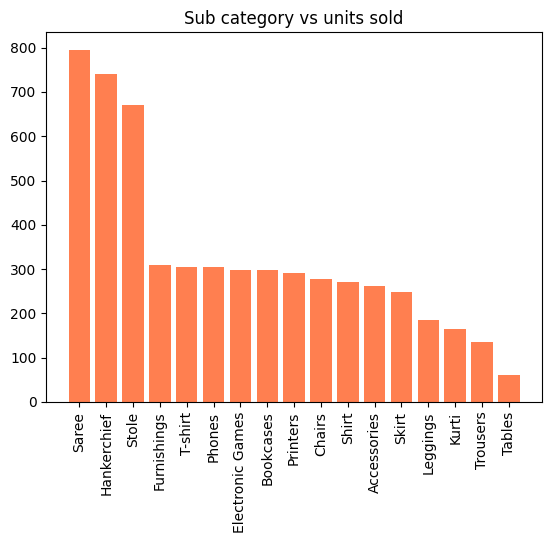

In [135]:
def plot4():
    sub_category=[]
    units=[]
    for row in r7:
        sub_category.append(row[0])
        units.append(row[1])
    plt.bar(sub_category, units,color='coral')
    plt.title('Sub category vs units sold')
    plt.xticks(rotation=90)
    plt.show()
plot4()

In [136]:
# print sub category wise units
cur.execute('''select `Category`,sum(Quantity) from sale_data
group by `Category`
order by sum(Quantity) desc''')
r8=cur.fetchall()

In [137]:
print("category wise units\n",r8)

category wise units
 [('Clothing', 3516), ('Electronics', 1154), ('Furniture', 945)]


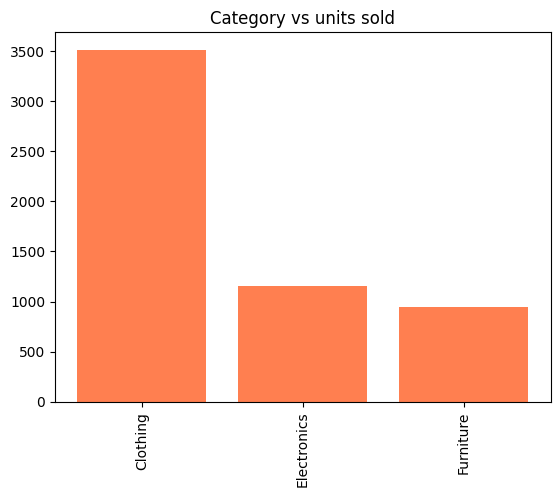

In [138]:
def plot5():
    category=[]
    units=[]
    for row in r8:
        category.append(row[0])
        units.append(row[1])
    plt.bar(category, units,color='coral')
    plt.title('Category vs units sold')
    plt.xticks(rotation=90)
    plt.show()
plot5()